# Explore here

In [2]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

In [4]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer

In [5]:
#loading dataset
total_data = pd.read_csv("../data/raw/House_Rent_Dataset.csv")
total_data.head(5)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [6]:
#Exploring the data
total_data.shape

(4746, 12)

In [7]:
#grabbing column
total_data.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [8]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [9]:
#looking for missing data
print("Total missing value for each column")
print(total_data.isnull().sum(axis=0))

Total missing value for each column
Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64


In [10]:
missing_proportion = round(total_data.isnull().sum(axis=0) / len(total_data), 4)

print("Proportion of missing values for each column:")
print(missing_proportion)

Proportion of missing values for each column:
Posted On            0.0
BHK                  0.0
Rent                 0.0
Size                 0.0
Floor                0.0
Area Type            0.0
Area Locality        0.0
City                 0.0
Furnishing Status    0.0
Tenant Preferred     0.0
Bathroom             0.0
Point of Contact     0.0
dtype: float64


In [11]:
#Eliminate duplicates
print(f"Dimensions before dropping duplicates: {total_data.shape}")

total_data = total_data.drop_duplicates()

print(f"Dimensions after dropping duplicates: {total_data.shape}")

Dimensions before dropping duplicates: (4746, 12)
Dimensions after dropping duplicates: (4746, 12)


In [12]:
#Eliminate Irrelevant information
columns_to_remove = ["Floor", "Area Type", "Point of Contact", "Tenant Preferred", "Posted On", "BHK", "Area Locality", "Furnishing Status"]

for column in columns_to_remove:
    try:
        total_data = total_data.drop(column, axis=1)
    except:
        print(f"Column {column} was already removed.")

total_data.head(5)

,Rent,Size,City,Bathroom
0,10000,1100,Kolkata,2
1,20000,800,Kolkata,1
2,17000,1000,Kolkata,1
3,10000,800,Kolkata,1
4,7500,850,Kolkata,1


In [13]:
#checking city with most higher rent
total_data[['City', 'Rent']]

,City,Rent
0,Kolkata,10000
1,Kolkata,20000
2,Kolkata,17000
3,Kolkata,10000
4,Kolkata,7500
...,...,...
4741,Hyderabad,15000
4742,Hyderabad,29000
4743,Hyderabad,35000
4744,Hyderabad,45000


In [14]:
#Price with per preferred tenants
total_data[['Size', 'Rent']]

,Size,Rent
0,1100,10000
1,800,20000
2,1000,17000
3,800,10000
4,850,7500
...,...,...
4741,1000,15000
4742,2000,29000
4743,1750,35000
4744,1500,45000


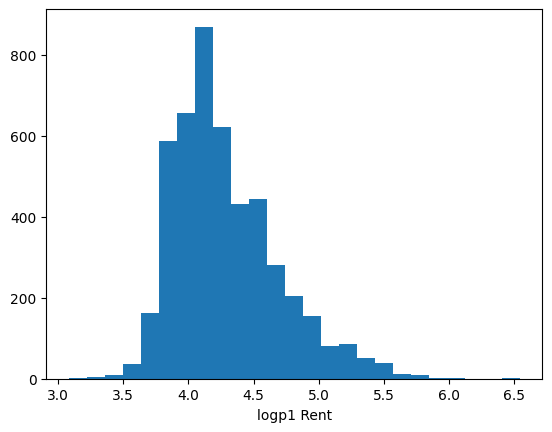

In [15]:
import numpy as np
plt.hist(np.log10(total_data['Rent']+1), bins=25)
plt.xlabel('logp1 Rent')
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


# Assuming 'Rent' is the target variable
X = total_data.drop('Rent', axis=1)
y = total_data['Rent']





In [17]:

# Split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [18]:
X_train

,Size,City,Bathroom
1995,950,Bangalore,2
1497,800,Bangalore,2
2763,545,Delhi,1
1351,465,Mumbai,1
1862,900,Bangalore,2
...,...,...,...
4426,1500,Hyderabad,3
466,1200,Kolkata,2
3092,800,Chennai,2
3772,3500,Chennai,3


In [19]:
y_train

1995    23500
1497    10500
2763    19000
1351    20000
1862    17000
        ...  
4426    25000
466     20000
3092    20000
3772    85000
860     25000
Name: Rent, Length: 3796, dtype: int64

In [20]:
X_test

,Size,City,Bathroom
1566,1100,Bangalore,2
3159,800,Chennai,2
538,518,Mumbai,2
2630,1500,Delhi,3
4418,2235,Hyderabad,5
...,...,...,...
4124,1248,Hyderabad,2
3400,1100,Chennai,2
1941,950,Bangalore,2
3679,1125,Chennai,2


In [21]:
y_test

1566    16000
3159    12000
538     28000
2630     8000
4418    46000
        ...  
4124    18000
3400    25000
1941    14000
3679    26000
2531    11000
Name: Rent, Length: 950, dtype: int64

In [22]:
# Instantiate the model
model = LinearRegression()


In [23]:
# Separate features and target
X = total_data.drop('Rent', axis=1)
y = total_data['Rent']

# We'll use OneHotEncoder to convert categorical variables into dummy/indicator variables
categorical_features = ['City']
one_hot_encoder = OneHotEncoder()

# Use ColumnTransformer to apply the encoder only to categorical features
preprocessor = ColumnTransformer(transformers=[
    ('onehot', one_hot_encoder, categorical_features)
], remainder='passthrough')  # 'passthrough' means that other columns will not be transformed

# Apply the preprocessor to obtain the transformed feature matrix
X = preprocessor.fit_transform(X)



In [24]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [25]:
# Make predictions and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse}")

Test MSE: 1907703463.5956347


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer


In [27]:


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [28]:
#Building  the Ramdom Regression Model
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # 100 trees

# Train the model
rf_regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [29]:
from sklearn.metrics import mean_squared_error

# Predicting the Test set results
y_pred = rf_regressor.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1639890587.2558055


In [32]:
import joblib
joblib.dump(rf_regressor, 'model.pkl')

['model.pkl']

In [31]:
rf_regressor

RandomForestRegressor(random_state=42)